In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('..\src\barbaraProjectived.png')

# # Display the image
# cv2.imshow('Image', image)

# # Wait for a mouse click
# def get_coordinates(event, x, y, flags, param):
#     if event == cv2.EVENT_LBUTTONDOWN:
#         print("Coordinates (x, y):", x, y)

# cv2.setMouseCallback('Image', get_coordinates)

# cv2.waitKey(0)
# cv2.destroyAllWindows()


[ WARN:0@78.943] global loadsave.cpp:248 findDecoder imread_('..\srarbaraProjectived.png'): can't open/read file: check file path/integrity


In [13]:

def AffineRecover(point, l1, l2, l3):
    Hpt = np.array([
        [1, 0,  -l1/l3],
        [0, 1,  -l2/l3],
        [0, 0,  1/l3]
    ]).astype('float32')
    
    Hprime = affinity(lambda1=.5, lambda2=.5) @ np.linalg.inv(Hpt).T

   
    transform_point= Hprime @ np.array(point).T
    if transform_point[2] == 0: transform_point[2] = 1
    transform_point = [transform_point[0]/transform_point[2], transform_point[1]/transform_point[2], 1]
    return transform_point


def affinity(theta=0, phi=0, lambda1=1, lambda2=1, tx=0, ty=0):
    D = np.array([
        [lambda1, 0],
        [0, lambda2]
    ])
    A = R(theta) @ R(-phi) @ D @ R(phi)
    aff_mat = np.array([
        [A[0][0], A[0][1], tx],
        [A[1][0], A[1][1], ty],
        [0,       0,        1]
    ])
    return aff_mat
    
def R(angle):
    angle = np.pi * angle / 180
    R = np.array([
        [np.cos(angle), -1*np.sin(angle)],
        [np.sin(angle), np.cos(angle)]
    ])
    return R

In [14]:
p1=[0,0,1]
p2=[442,0,1]
p3=[262,267,1]
p4=[0,332,1]

l1=np.cross(p1,p2).astype('float32')
l2=np.cross(p3,p4).astype('float32')

l3=np.cross(p1,p4).astype('float32')
l4=np.cross(p2,p3).astype('float32')

point1=np.cross(l1,l2).astype('float32')
point2=np.cross(l3,l4).astype('float32')

L=np.cross(point1,point2).astype('float32')
L[0]=L[0]/L[2]
L[1]=L[1]/L[2]
L[2]=1
print(L)

[-7.4726384e-04 -1.5252428e-03  1.0000000e+00]


(442, 332)
[[ 33  19  31 ...  71  66   7]
 [ 47  27  44 ...  95  87   9]
 [ 48  28  46 ... 100  95  10]
 ...
 [ 48  36  39 ...   0   0   0]
 [ 48  22  20 ...   0   0   0]
 [ 48   1   1 ...   0   0   0]]


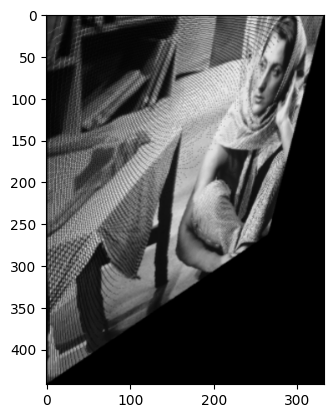

In [15]:
import cv2
im = cv2.imread('../src/barbaraProjectived.png', cv2.IMREAD_GRAYSCALE)
print(im.shape)
print(im)
plt.imshow(im, cmap='gray', vmin=0, vmax=255)
plt.show()

[[   0    0   33]
 [   0    0   19]
 [   0    1   31]
 ...
 [1307  975    0]
 [1319  987    0]
 [1331  999    0]]


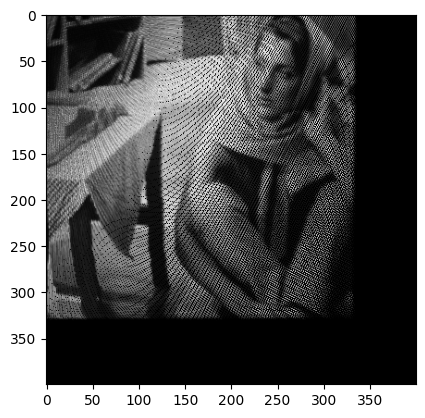

In [16]:
new_img_type = []
for i in range(442):
    for j in range(332):
        new_point = AffineRecover([i,j,1],L[0],L[1],L[2])
        i_new = int(new_point[0])
        j_new = int(new_point[1])
        new_img_type.append([i_new, j_new, im[i][j]])
new_img_type = np.array(new_img_type)
print(new_img_type)
X, Y, C = zip(*new_img_type)
X -= np.min(X)
Y -= np.min(Y)
matrix_shape = (np.max(X) + 1, np.max(Y) + 1)
result_matrix = np.zeros(matrix_shape)

result_matrix[X, Y] = C

result_matrix = np.array(result_matrix)
result_matrix = result_matrix[:400, :400]

plt.imshow(result_matrix, cmap='gray', vmin=0, vmax=255)
plt.show()
